# Smart Pipeline Diagnostics
[![Smart_pipeline_diagnostics.ipynb](https://img.shields.io/badge/github-%23121011.svg?logo=github)](https://github.com/ampl/colab.ampl.com/blob/master/authors/mikhail/Utilities_networks/Smart_pipeline_diagnostics.ipynb) [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ampl/colab.ampl.com/blob/master/authors/mikhail/Utilities_networks/Smart_pipeline_diagnostics.ipynb) [![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/ampl/colab.ampl.com/blob/master/authors/mikhail/Utilities_networks/Smart_pipeline_diagnostics.ipynb) [![Gradient](https://assets.paperspace.io/img/gradient-badge.svg)](https://console.paperspace.com/github/ampl/colab.ampl.com/blob/master/authors/mikhail/Utilities_networks/Smart_pipeline_diagnostics.ipynb) [![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/ampl/colab.ampl.com/blob/master/authors/mikhail/Utilities_networks/Smart_pipeline_diagnostics.ipynb) [![Hits](https://h.ampl.com/https://github.com/ampl/colab.ampl.com/blob/master/authors/mikhail/Utilities_networks/Smart_pipeline_diagnostics.ipynb)](https://colab.ampl.com)

Description:

The Pipeline Smart Diagnostic Model is designed to strategically plan and budget the technical diagnostics of an extensive pipeline network to maintain operational integrity and profitability. The company’s pipeline system, which spans thousands of kilometers and includes diameters from 250 mm to 500 mm, is essential for efficient and reliable product transport. However, a significant portion of these pipelines is heavily worn, increasing the risk of ruptures and failures, which could disrupt operations and result in substantial financial losses.

To reduce these risks, the operating pressure of the network must often be lowered, directly impacting the system's throughput and reducing overall revenue. Replacing the entire network is not financially feasible due to the high costs involved. Instead, the company has allocated $675 thousands over the next five years to perform targeted diagnostics, enabling it to prioritize sections for maintenance or replacement. 

This model leverages data on pipeline wear levels, diagnostic tool availability, annual budgets, and diagnostic costs to optimize the diagnostic schedule. Diagnostic tools, known as Pipeline Diagnostic Complexes (KDTs), vary in capability and availability. Some KDTs are limited to specific pipeline diameters, while others are versatile across all sizes. Furthermore, the KDTs have finite service lifespans and are subject to replacement or addition over the five-year period. This model considers these constraints to maximize diagnostic coverage of the most critical sections, aiming to balance costs with the strategic goal of improving pipeline safety and throughput.

The Pipeline Diagnostics Optimization Model thus serves as a vital tool for decision-making, allowing the company to allocate resources efficiently, minimize risks, and sustain profitability. By identifying high-wear areas for focused diagnostics and enabling data-driven maintenance, the model supports a proactive, cost-effective approach to managing aging infrastructure.

[*Partner with the AMPL team to transform complex problems into optimized solutions. AMPL consulting services combine deep technical knowledge with industry-leading insights, helping you unlock the full potential of optimization within your organization.*](https://ampl.com/services/)

Tags: Pipeline Diagnostics, Risk Management, MIP, ampl, cbc

Notebook author: Mikhail Riabtsev <<mail@solverytic.com>>
***

## 1. Problem statement

The company manages an extensive pipeline network featuring a range of diameters—250, 330, 400 and 500 mm. A significant portion of this infrastructure is aged and deteriorating, with considerable wear and tear. To mitigate the risks of potential pipeline ruptures, the company is forced to lower the operational pressure throughout the network. However, reducing pressure decreases the system's throughput, directly impacting profitability. Complete replacement of these pipelines is not feasible due to the substantial capital investment required.

To improve network throughput and sustain company profitability, precise diagnostics of the pipeline conditions is critical. Through detailed diagnostics, the company can create a comprehensive technical condition map of the network, identifying sections that require total replacement and those that could operate more efficiently with targeted repairs. Over the next five years, the company has earmarked $675 thousands for these technical diagnostics. A year-by-year diagnostic plan has been established, detailing the budget allocation and specific inspection goals:

**Annual allocated budget**

| Diameter | Year 1 | Year 2 | Year 3 | Year 4 | Year 5 |
|----------|--------|--------|--------|--------|--------|
| **250**  | 40     | 50     | 40     | 50     | 40     |
| **330**  | 30     | 60     | 30     | 30     | 40     |
| **400**  | 30     | 50     | 10     | 40     | 40     |
| **500**  | 20     | 20     | 20     | 20     | 15     |


**Minimum length of pipeline diagnostics**

| Diameter | Year 1 | Year 2 | Year 3 | Year 4 | Year 5 |
|----------|--------|--------|--------|--------|--------|
| **250**  | 10     | 15     | 14     | 15     | 14     |
| **330**  | 13     | 16     | 13     | 30     | 4      |
| **400**  | 3      | 5      | 1      | 4      | 4      |
| **500**  | 2      | 2      | 2      | 2      | 3.5    |


For these diagnostics, potential contractors have access to 12 distinct types of Pipeline Diagnostic Complexes (KDTs). The availability of these complexes varies, as each has a finite service life, and new units are scheduled to be introduced over the next few years:

***KTD Amounts (Available Equipment by Year)***

| KTD      | Year 1 | Year 2 | Year 3 | Year 4 | Year 5 |
|----------|--------|--------|--------|--------|--------|
| KTD-1    | 1      | 1      | 1      | 0      | 0      |
| KTD-2    | 1      | 1      | 1      | 1      | 1      |
| KTD-3    | 1      | 1      | 1      | 0      | 0      |
| KTD-4    | 2      | 2      | 2      | 1      | 1      |
| KTD-5    | 1      | 1      | 1      | 1      | 1      |
| KTD-6    | 1      | 1      | 1      | 0      | 0      |
| KTD-7    | 1      | 1      | 1      | 1      | 0      |
| KTD-8    | 1      | 1      | 1      | 1      | 1      |
| KTD-9    | 1      | 1      | 1      | 1      | 1      |
| KTD-10   | 30     | 20     | 20     | 10     | 10     |
| KTD-11   | 0      | 20     | 20     | 20     | 10     |
| KTD-12   | 0      | 5      | 5      | 10     | 10     |

 Complexes KDT 01 through KDT 12 able to operate on pipelines of different diameters:
 
 ***Range of use, mm and cost of diagnostics $/m.***

| KTD      | Cost | d_min | d_max |
|----------|------|-------|-------|
| KTD-1    | 2.2  | 100   | 500   |
| KTD-2    | 2    | 200   | 500   |
| KTD-3    | 1.98 | 300   | 500   |
| KTD-4    | 1.8  | 400   | 500   |
| KTD-5    | 3    | 300   | 500   |
| KTD-6    | 2.3  | 200   | 500   |
| KTD-7    | 2.5  | 100   | 500   |
| KTD-8    | 1.9  | 200   | 500   |
| KTD-9    | 1.7  | 300   | 500   |
| KTD-10   | 0.5  | 400   | 500   |
| KTD-11   | 0.6  | 100   | 500   |
| KTD-12   | 0.3  | 100   | 500   |

 A detailed five-year plan outlines the projected availability of diagnostic equipment, inspection costs for each pipeline diameter, and the expected annual productivity of each diagnostic complex:

***KTD Performance (Km of Pipeline Covered per Unit of Equipment by Diameter)***

| KTD      | 250   | 330   | 400   | 500   |
|----------|-------|-------|-------|-------|
| KTD-1    | 3     | 3     | 0     | 0     |
| KTD-2    | 3     | 3     | 3     | 3     |
| KTD-3    | 4     | 4     | 4     | 4     |
| KTD-4    | 5     | 5     | 0     | 0     |
| KTD-5    | 5     | 5     | 5     | 5     |
| KTD-6    | 6     | 6     | 0     | 0     |
| KTD-7    | 6.5   | 6.5   | 6     | 0     |
| KTD-8    | 6.5   | 6.5   | 6.5   | 6.5   |
| KTD-9    | 7     | 7     | 7     | 7     |
| KTD-10   | 7.5   | 7.5   | 7.5   | 7.5   |
| KTD-11   | 8     | 7     | 7     | 7     |
| KTD-12   | 9     | 8     | 8     | 8     |


## Objective

### It is necessary to:
- Maximize the length of pipelines being diagnosed within the allocated budget;
- Minimize diagnostic costs for Minimum length of pipeline diagnostics.

***

## 2. Download Necessary Extensions and Libraries
Let's start by downloading the necessary extensions and libraries

In [1]:
# Install dependencies
%pip install -q amplpy pandas numpy matplotlib seaborn
import pandas as pd  # Loading panda to work with pandas.DataFrame objects (https://pandas.pydata.org/)
import numpy as np  # Loading numpy to perform multidimensional calculations numpy.matrix (https://numpy.org/)

In [2]:
# Google Colab & Kaggle integration
from amplpy import AMPL, ampl_notebook

ampl = ampl_notebook(
    modules=["cbc", "highs", "gurobi"],  # modules to install
    license_uuid="default",  # license to use
)  # instantiate AMPL object and register magics

## 3. AMPL Model Formulation

In [3]:
%%writefile smart_pipeline_diagnostics.mod
reset;

### SETS ###
set DIAMETERS ;                           # Set of pipeline diameters, mm
set YEARS ;                               # Set representing each year of the 5-year diagnostic plan
set KTD ;                                 # List of diagnostic equipment types
set ATTR ;                                # Set of attributes for each diagnostic equipment type

### PARAMETERS ###
param budget {DIAMETERS, YEARS} >= 0;     # Annual budget allocation for diagnostics per pipeline diameter and year
param min_length {DIAMETERS, YEARS} >= 0; # Planned diagnostic length (km) each year by pipeline diameter

param KTD_attributes {KTD, ATTR} >= 0;    # Attributes for each equipment type (cost, min/max diameter)
param KTD_amount {KTD, YEARS} >= 0;       # Amout of each diagnostic equipment type available each year
param KTD_perfomance {KTD, DIAMETERS} >= 0;# Diagnostic performance of each equipment type by pipeline diameter

set LINKS within {KTD, DIAMETERS} :=      # Define compatibility between equipment types and pipeline diameters
    {i in KTD, d in DIAMETERS: KTD_attributes [i,'d_min'] <= d <= KTD_attributes [i,'d_max']} ;  

### VARIABLES ###
var KTD_Usage {LINKS, YEARS} binary;      # Indicating whether a diagnostic equipment type (i) is used for a pipeline diameter (d) in a given year (t).
var KTD_Required {LINKS, YEARS} integer >= 0 ; # Integer amount of diagnostic equipment required for each compatible equipment-diameter pair (LINKS) each year (YEARS)

 # Auxiliary variables
var Budget_Diameters_Years {d in DIAMETERS, t in YEARS} = 
  sum{(i,d) in LINKS} KTD_Required[i,d,t] * KTD_perfomance[i,d] * KTD_attributes[i,'cost'] ;
var Length_Diameters_Years {d in DIAMETERS, t in YEARS} = 
  sum{(i,d) in LINKS} KTD_Required[i,d,t] * KTD_perfomance[i,d] ;
var KTD_Perfomance_Years {i in KTD, t in YEARS} = 
  sum{(i,d) in LINKS} KTD_Required[i,d,t] * KTD_perfomance[i,d] ;

### OBJECTIVE FUNCTION ###
# Minimize the total cost of diagnostic operations over the 5-year period
maximize Total_Length: sum {i in KTD, t in YEARS} 
     sum{(i,d) in LINKS} KTD_Required [i,d,t] * KTD_perfomance[i,d] ;

minimize Total_Cost: sum {i in KTD, t in YEARS} 
  sum{(i,d) in LINKS} KTD_Required [i,d,t] * KTD_perfomance[i,d] * 10e3 * KTD_attributes[i,'cost'] ;


### CONSTRAINTS ###
# 1. Limit each diagnostic equipment type `i` to be used only once per pipeline diameter `d` per year `t`.
s.t. KTD_Usage_Limit {i in KTD, t in YEARS}: 
   sum{(i,d) in LINKS} KTD_Usage[i,d,t] <= 1 ;

 # 2. Ensure total diagnostic cost across all years and diameters does not exceed the overall budget
   s.t. Annual_Budget_Limit {d in DIAMETERS, t in YEARS}: 
      sum {(i,d) in LINKS} KTD_Required[i,d,t] * KTD_perfomance[i,d] * 10e3 * KTD_attributes[i,'cost'] <= budget[d,t] * 10e3 ;

 # 3. Match the planned diagnostic length for each pipeline diameter each year
   s.t. Planned_Diagnostics {d in DIAMETERS, t in YEARS}:
      sum {(i,d) in LINKS} KTD_Required[i,d,t] * KTD_perfomance[i,d] >= min_length[d,t];

 # 4. Ensure that the equipment used does not exceed the available amount
   s.t. Equipment_Availability {(i,d) in LINKS, t in YEARS}: 
      KTD_Required[i,d,t] <= KTD_Usage[i,d,t] * KTD_amount[i,t];

Overwriting smart_pipeline_diagnostics.mod


## 4. Load data

In [4]:
ampl.read("smart_pipeline_diagnostics.mod")  # Load the AMPL model from the file

# Define pipeline diameters in millimeters (mm) for different pipeline segments
ampl.set["DIAMETERS"] = [250, 330, 400, 500]

# Define the years over which diagnostics are planned (5-year plan)
ampl.set["YEARS"] = list(range(1, 6))

# Define diagnostic equipment types for selection and assignment
ampl.set["KTD"] = [
    "KTD-1",
    "KTD-2",
    "KTD-3",
    "KTD-4",
    "KTD-5",
    "KTD-6",
    "KTD-7",
    "KTD-8",
    "KTD-9",
    "KTD-10",
    "KTD-11",
    "KTD-12",
]

# Define attributes of each diagnostic type: cost per km ($/km), minimum diameter (mm), maximum diameter (mm)
ampl.set["ATTR"] = ["cost", "d_min", "d_max"]

# Define the annual budget limits for diagnostic operations by diameter and year (values in thousands dollars)
ampl.param["budget"] = {
    (250, 1): 40,
    (250, 2): 50,
    (250, 3): 40,
    (250, 4): 50,
    (250, 5): 40,
    (330, 1): 30,
    (330, 2): 60,
    (330, 3): 30,
    (330, 4): 30,
    (330, 5): 40,
    (400, 1): 30,
    (400, 2): 50,
    (400, 3): 10,
    (400, 4): 40,
    (400, 5): 40,
    (500, 1): 20,
    (500, 2): 20,
    (500, 3): 20,
    (500, 4): 20,
    (500, 5): 15,
}

# Define minimum pipeline length (in kilometers) to be inspected annually by diameter and year
ampl.param["min_length"] = {
    (250, 1): 10,
    (250, 2): 15,
    (250, 3): 14,
    (250, 4): 15,
    (250, 5): 14,
    (330, 1): 13,
    (330, 2): 16,
    (330, 3): 13,
    (330, 4): 30,
    (330, 5): 4,
    (400, 1): 3,
    (400, 2): 5,
    (400, 3): 1,
    (400, 4): 4,
    (400, 5): 4,
    (500, 1): 2,
    (500, 2): 2,
    (500, 3): 2,
    (500, 4): 2,
    (500, 5): 3.5,
}

# Assign diagnostic attributes for each type of diagnostic equipment:
# - 'cost' per m in dollars
# - 'd_min' and 'd_max' specify the minimum and maximum compatible pipeline diameter (mm)
ampl.param["KTD_attributes"] = {
    ("KTD-1", "cost"): 2.2,
    ("KTD-1", "d_min"): 100,
    ("KTD-1", "d_max"): 500,
    ("KTD-2", "cost"): 2,
    ("KTD-2", "d_min"): 200,
    ("KTD-2", "d_max"): 500,
    ("KTD-3", "cost"): 1.98,
    ("KTD-3", "d_min"): 300,
    ("KTD-3", "d_max"): 500,
    ("KTD-4", "cost"): 1.8,
    ("KTD-4", "d_min"): 400,
    ("KTD-4", "d_max"): 500,
    ("KTD-5", "cost"): 3,
    ("KTD-5", "d_min"): 300,
    ("KTD-5", "d_max"): 500,
    ("KTD-6", "cost"): 2.3,
    ("KTD-6", "d_min"): 200,
    ("KTD-6", "d_max"): 500,
    ("KTD-7", "cost"): 2.5,
    ("KTD-7", "d_min"): 100,
    ("KTD-7", "d_max"): 500,
    ("KTD-8", "cost"): 1.9,
    ("KTD-8", "d_min"): 200,
    ("KTD-8", "d_max"): 500,
    ("KTD-9", "cost"): 1.7,
    ("KTD-9", "d_min"): 300,
    ("KTD-9", "d_max"): 500,
    ("KTD-10", "cost"): 0.5,
    ("KTD-10", "d_min"): 400,
    ("KTD-10", "d_max"): 500,
    ("KTD-11", "cost"): 0.6,
    ("KTD-11", "d_min"): 100,
    ("KTD-11", "d_max"): 500,
    ("KTD-12", "cost"): 0.3,
    ("KTD-12", "d_min"): 100,
    ("KTD-12", "d_max"): 500,
}

# Define the quantity of each diagnostic equipment type available each year
ampl.param["KTD_amount"] = {
    ("KTD-1", 1): 1,
    ("KTD-1", 2): 1,
    ("KTD-1", 3): 1,
    ("KTD-1", 4): 0,
    ("KTD-1", 5): 0,
    ("KTD-2", 1): 1,
    ("KTD-2", 2): 1,
    ("KTD-2", 3): 1,
    ("KTD-2", 4): 1,
    ("KTD-2", 5): 1,
    ("KTD-3", 1): 1,
    ("KTD-3", 2): 1,
    ("KTD-3", 3): 1,
    ("KTD-3", 4): 0,
    ("KTD-3", 5): 0,
    ("KTD-4", 1): 2,
    ("KTD-4", 2): 2,
    ("KTD-4", 3): 2,
    ("KTD-4", 4): 1,
    ("KTD-4", 5): 1,
    ("KTD-5", 1): 1,
    ("KTD-5", 2): 1,
    ("KTD-5", 3): 1,
    ("KTD-5", 4): 1,
    ("KTD-5", 5): 1,
    ("KTD-6", 1): 1,
    ("KTD-6", 2): 1,
    ("KTD-6", 3): 1,
    ("KTD-6", 4): 0,
    ("KTD-6", 5): 0,
    ("KTD-7", 1): 1,
    ("KTD-7", 2): 1,
    ("KTD-7", 3): 1,
    ("KTD-7", 4): 1,
    ("KTD-7", 5): 0,
    ("KTD-8", 1): 1,
    ("KTD-8", 2): 1,
    ("KTD-8", 3): 1,
    ("KTD-8", 4): 1,
    ("KTD-8", 5): 1,
    ("KTD-9", 1): 1,
    ("KTD-9", 2): 1,
    ("KTD-9", 3): 1,
    ("KTD-9", 4): 1,
    ("KTD-9", 5): 1,
    ("KTD-10", 1): 30,
    ("KTD-10", 2): 20,
    ("KTD-10", 3): 20,
    ("KTD-10", 4): 10,
    ("KTD-10", 5): 10,
    ("KTD-11", 1): 0,
    ("KTD-11", 2): 20,
    ("KTD-11", 3): 20,
    ("KTD-11", 4): 20,
    ("KTD-11", 5): 10,
    ("KTD-12", 1): 0,
    ("KTD-12", 2): 5,
    ("KTD-12", 3): 5,
    ("KTD-12", 4): 10,
    ("KTD-12", 5): 10,
}

# Set the performance metrics (km of pipeline covered per unit of equipment) for each diagnostic type by pipeline diameter
ampl.param["KTD_perfomance"] = {
    ("KTD-1", 250): 3,
    ("KTD-1", 330): 3,
    ("KTD-1", 400): 0,
    ("KTD-1", 500): 0,
    ("KTD-2", 250): 3,
    ("KTD-2", 330): 3,
    ("KTD-2", 400): 3,
    ("KTD-2", 500): 3,
    ("KTD-3", 250): 4,
    ("KTD-3", 330): 4,
    ("KTD-3", 400): 4,
    ("KTD-3", 500): 4,
    ("KTD-4", 250): 5,
    ("KTD-4", 330): 5,
    ("KTD-4", 400): 0,
    ("KTD-4", 500): 0,
    ("KTD-5", 250): 5,
    ("KTD-5", 330): 5,
    ("KTD-5", 400): 5,
    ("KTD-5", 500): 5,
    ("KTD-6", 250): 6,
    ("KTD-6", 330): 6,
    ("KTD-6", 400): 0,
    ("KTD-6", 500): 0,
    ("KTD-7", 250): 6.5,
    ("KTD-7", 330): 6.5,
    ("KTD-7", 400): 6,
    ("KTD-7", 500): 0,
    ("KTD-8", 250): 6.5,
    ("KTD-8", 330): 6.5,
    ("KTD-8", 400): 6.5,
    ("KTD-8", 500): 6.5,
    ("KTD-9", 250): 7,
    ("KTD-9", 330): 7,
    ("KTD-9", 400): 7,
    ("KTD-9", 500): 7,
    ("KTD-10", 250): 7.5,
    ("KTD-10", 330): 7.5,
    ("KTD-10", 400): 7.5,
    ("KTD-10", 500): 7.5,
    ("KTD-11", 250): 8,
    ("KTD-11", 330): 7,
    ("KTD-11", 400): 7,
    ("KTD-11", 500): 7,
    ("KTD-12", 250): 9,
    ("KTD-12", 330): 8,
    ("KTD-12", 400): 8,
    ("KTD-12", 500): 8,
}

## 5. Solve problem

In [5]:
# Set the solver type for use in solving the problems
solver = "cbc"  # Use CBC solver for optimization tasks

ampl.option["show_stats"] = 1  # Show problem size statistics (default: 0)
ampl.option["display_1col"] = 0  # Disable single-column data display
ampl.option["omit_zero_rows"] = 1  # Hide rows with zero values
ampl.option["omit_zero_cols"] = 1  # Hide columns with zero values
ampl.option["mp_options"] = (
    "outlev=1 lim:time=20"  # Configure CBC options (output level and time limit)
)

ampl.solve(
    solver=solver, verbose=False
)  # Solve the optimization problem using CBC solver
assert ampl.solve_result == "solved", ampl.solve_result

## 6. Display results

In [6]:
# Display results for key variables
ampl.display(
    "KTD_Required",
    "Budget_Diameters_Years",
    "Length_Diameters_Years",
    "KTD_Perfomance_Years",
)

KTD_Required [*,250,*]
:        1   2   3   4    5     :=
KTD-1    1   1   0    0    0
KTD-11   0   0   8   10    0
KTD-12   0   5   0    0   10
KTD-2    1   0   0    0    0
KTD-6    1   0   0    0    0
KTD-7    0   1   0    0    0
KTD-8    1   1   0    0    1

 [*,330,*]
:        1   2    3   4    5    :=
KTD-11   0   14   0    0   9
KTD-12   0    0   5   10   0
KTD-2    0    0   1    0   0
KTD-7    1    0   0    0   0
KTD-9    1    0   1    0   0

 [*,400,*]
:        1   2    3   4    5     :=
KTD-10   8   13   0   10   10
KTD-3    0    0   1    0    0

 [*,500,*]
:        1   2   3   4   5    :=
KTD-10   0   0   5   0   0
KTD-2    0   0   0   1   0
KTD-3    0   1   0   0   0
KTD-5    1   0   0   0   0
KTD-9    0   1   0   1   1
;

# $2 = Length_Diameters_Years
:        Budget_Diameters_Years    $2  KTD_Perfomance_Years    :=
250    1          38.75           18.5            .
250    2          48.7            61              .
250    3          38.4            64              .
250 

## 7. Retrieve solution in Python

In [7]:
# Initialize an empty dictionary to store AMPL variable data
amplvar = dict()

# Prepare a list of AMPL variables
list_of_ampl_variables = [item[0] for item in ampl.get_variables()]

# Iterate over each variable name in the list
for key_ampl in list_of_ampl_variables:
    # Skip certain variables that are not to be processed (these variables won't be included in the output)
    if key_ampl not in ["KTD_Usage"]:
        # Convert the AMPL variable data to a pandas DataFrame
        df = ampl.var[key_ampl].to_pandas()
        # Filter the DataFrame to include only rows where the variable's value is greater than a small threshold (1e-5)
        filtered_df = df[df[f"{key_ampl}.val"] > 1e-5]
        # Round the values in the DataFrame to two decimal places
        rounded_df = filtered_df.round(2)
        # Convert the filtered DataFrame to a dictionary and add it to the amplvar dictionary
        amplvar[key_ampl] = rounded_df  # .to_dict(orient='records')

## 8. Visualization of the solution

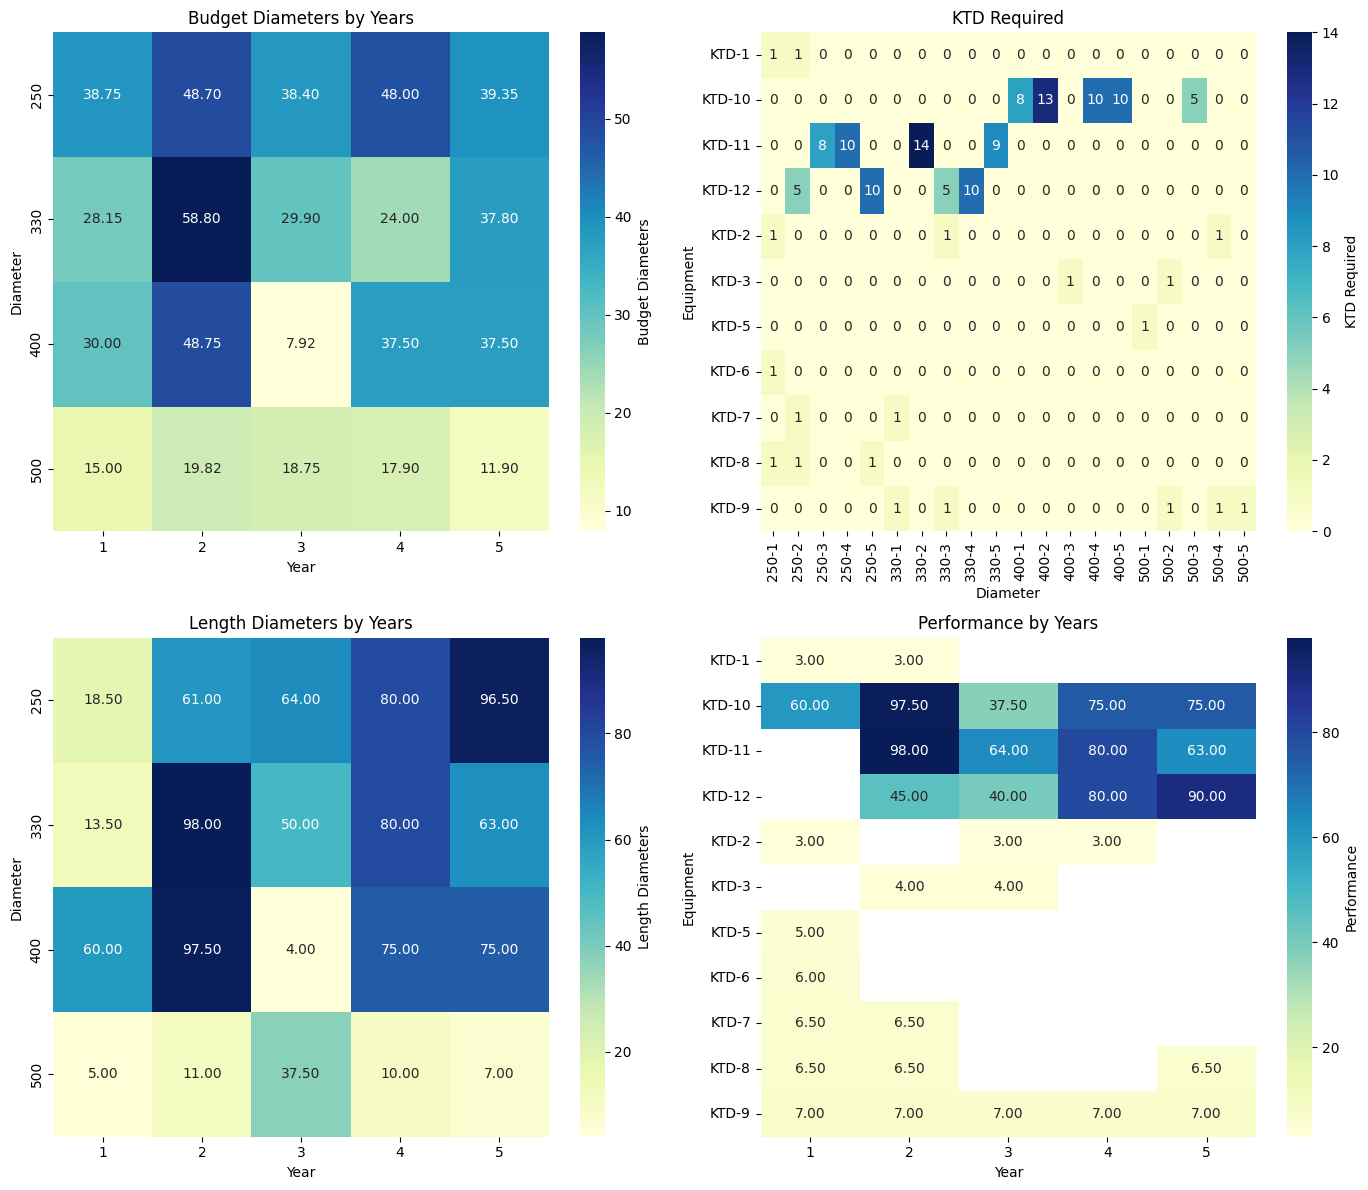

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fill NaNs in pivot tables with 0
budget_df = amplvar["Budget_Diameters_Years"]
ktd_df = amplvar["KTD_Required"]
length_df = amplvar["Length_Diameters_Years"]
perfomance_df = amplvar["KTD_Perfomance_Years"]

budget_pivot = budget_df.pivot_table(
    index="index0",
    columns="index1",
    values="Budget_Diameters_Years.val",
    aggfunc="mean",
).fillna(0)
ktd_pivot = ktd_df.pivot_table(
    index="index0",
    columns=["index1", "index2"],
    values="KTD_Required.val",
    aggfunc="mean",
).fillna(0)
length_pivot = length_df.pivot_table(
    index="index0",
    columns="index1",
    values="Length_Diameters_Years.val",
    aggfunc="mean",
).fillna(0)
perfomance_pivot = perfomance_df.pivot_table(
    index="index0", columns="index1", values="KTD_Perfomance_Years.val", aggfunc="mean"
).fillna(0)

# Example data preparation (replace 0 values with NaN)
budget_pivot = budget_pivot.replace(0, np.nan)
ktd_pivot = ktd_pivot.replace(0, np.nan)
ktd_pivot = ktd_pivot.fillna(0).astype(int)
length_pivot = length_pivot.replace(0, np.nan)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# Budget Heatmap
sns.heatmap(
    budget_pivot,
    annot=True,
    cmap="YlGnBu",
    fmt=".2f",
    cbar_kws={"label": "Budget Diameters"},
    ax=axes[0, 0],
)
axes[0, 0].set_title("Budget Diameters by Years")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Diameter")

# KTD Required Heatmap
sns.heatmap(
    ktd_pivot,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    cbar_kws={"label": "KTD Required"},
    ax=axes[0, 1],
)
axes[0, 1].set_title("KTD Required")
axes[0, 1].set_xlabel("Diameter")
axes[0, 1].set_ylabel("Equipment")

# Length Heatmap
sns.heatmap(
    length_pivot,
    annot=True,
    cmap="YlGnBu",
    fmt=".2f",
    cbar_kws={"label": "Length Diameters"},
    ax=axes[1, 0],
)
axes[1, 0].set_title("Length Diameters by Years")
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Diameter")

# Optional: Handle the fourth subplot (Performance or disable)
if "perfomance_pivot" in locals():
    sns.heatmap(
        perfomance_pivot.replace(0, np.nan),
        annot=True,
        cmap="YlGnBu",
        fmt=".2f",
        cbar_kws={"label": "Performance"},
        ax=axes[1, 1],
    )
    axes[1, 1].set_title("Performance by Years")
    axes[1, 1].set_xlabel("Year")
    axes[1, 1].set_ylabel("Equipment")
else:
    axes[1, 1].axis("off")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## 9. Extensions

- ***Priority-Based Diagnostic Allocation:*** Introduce a priority system to allocate diagnostics where they are most needed, based on the importance of certain pipelines (e.g., critical or high-risk pipelines).
- ***Multi-Objective Optimization:*** Combine both objectives (minimizing cost and maximizing coverage) into a weighted sum or use a more sophisticated multi-objective optimization approach, such as goal programming or epsilon-constraint method.